In [1]:
import image_dataset_loader
from matplotlib import pyplot as plt
from sklearn import svm
import numpy as np

In [2]:
train_dataset, test_dataset = image_dataset_loader.create_datasets('new_train_data/data/')

In [6]:
x_train, y_train = zip(*train_dataset)
x_test, y_test = zip(*test_dataset)

num_features = 42

In [8]:
flattened_x_train = np.zeros((len(x_train), num_features))

for i in range(len(x_train)):
    flattened_x_train[i, :] = image_dataset_loader.process_image(x_train[i], y_train[i], True)

flattened_x_test = np.zeros((len(x_test), num_features))

for i in range(len(x_test)):
    flattened_x_test[i, :] = image_dataset_loader.process_image(x_test[i], y_test[i], True)

In [10]:
clf = svm.LinearSVC(dual="auto")
clf.fit(flattened_x_train, y_train)

LinearSVC(dual='auto')

In [11]:
for i in range(len(flattened_x_test)):
    landmark, label = flattened_x_test[i], y_test[i]
    dec = clf.decision_function(landmark.reshape(1, -1))
    print(np.argmax(dec, axis=1)[0] == label)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


1


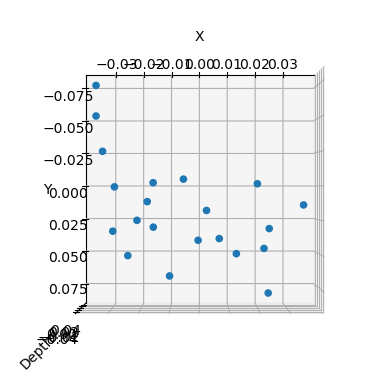

In [13]:
for i in range(flattened_x_train.shape[0]):
    landmark = flattened_x_train[i]
    label = y_train[i]
    
    print(label)
    shaped = landmark.reshape(1, 21, 2)
    for i in range(shaped.shape[0]):
        x, y = zip(*shaped[i])

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(x, y)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Depth')
        ax.view_init(elev=-90, azim=-90)
        plt.show()
    break

yolov8 + CNN had too much variability
mediapipe + NN had subpar accuracy